# Numerical Solutions with odeint

Most differential equations cannot be solved analytically in terms of elementary functions. So what do we do? We can always approximate! The function `scipy.integrate.odeint` approximates solutions of first order equations using highly accurate and optimized numerical methods. Our goal is to learn how to use `odeint` and how to interpret the output.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## Basic Procedure

The function `scipy.integrate.odeint` approximates the solution of a first order differential equation with an initial condition:

$$
y' = f(y,t) \ , \ \ y(t_0) = y_0
$$

The function `scipy.integrate.odeint` takes input parameters `f`, `y0` and `t` where:

* `f` is a Python function which represents the right hand side of the equation $y' = f(y,t)$
* `y0` is the initial value $y(t_0) = y_0$
* `t` is a NumPy array of $t$ values such that the first entry is $t_0$

The fuction `scipy.integrate.odeint` returns a NumPy array `y` such that:

* the length of `y` is equal to the length of `t`
* the first value `y[0]` is the initial value $y(t_0) = y_0$
* the value `y[n]` at index $n$ is an approximation of the solution $y(t_n)$ at time $t_n$
* the value $t_n$ is the entry `t[n]` at index $n$ in the input array `t`

Given a differential equation with initial value, it is up to us to construct the input vector `t`. We need to choose a final value $t_f$ and the number of values in the input vector `t`.

## Examples

### Example: $y' = -2y^2t$

Approximate the unique solution of the equation

$$
y' = -2y^2 t \ , \ \ y(0)=1
$$

over the interval $[0,5]$ and compare to the exact solution

$$
y(t) = \frac{1}{t^2 + 1}
$$

Define the function `f` which represents the right hand side of the equation:

In [20]:
f = lambda y,t: -2*y**2*t

Plug in some values $y$ and $t$ to see that it simply returns the value $-2y^2t$:

In [21]:
f(1,2)

-4

In [23]:
f(-1,1/2)

-1.0

Define the initial value:

In [24]:
y0 = 1

Construct a NumPy array of $t$ values from $t_0 = 0$ to $t_f = 5$. The number of points in the array is our decision. The number of points does not change the accuracy of the results. It only changes the number of $y$ values in the output and we need enough to plot the approximation smoothly. Let's choose $N=51$ values so that the step size between $t$ values is 0.1.

In [33]:
t0 = 0; tf = 5; N = 51
t = np.linspace(t0,tf,N)

Take a look at the first 5 entries of `t`:

In [34]:
t[:5]

array([0. , 0.1, 0.2, 0.3, 0.4])

And the last 5 entries:

In [35]:
t[-5:]

array([4.6, 4.7, 4.8, 4.9, 5. ])

Compute the approximations using `odeint`:

In [36]:
y = spi.odeint(f,y0,t)

Check the length of the NumPy array `y`:

In [37]:
len(y)

51

It's the same as the length of `t`:

In [38]:
len(t)

51

Look at the first 5 entries of `y`:

In [39]:
y[:5]

array([[1.        ],
       [0.99009914],
       [0.96153854],
       [0.91743128],
       [0.86206907]])

The first value is the initial value $y(0)=1$ and the approximations of the values $y(t_n)$ are decreasing. Let's plot the approximation with the exact solution.

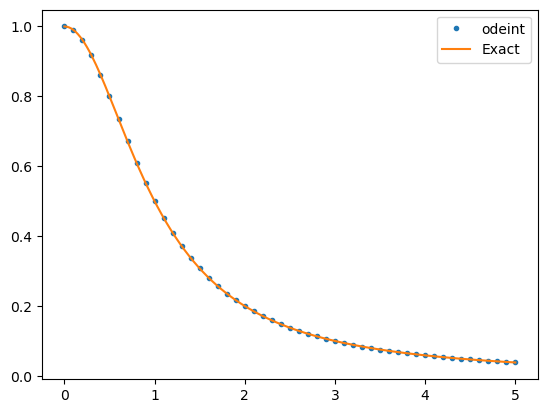

In [42]:
plt.plot(t,y,'.',label='odeint')
T = np.linspace(t0,tf,200)
Y = 1/(T**2 + 1)
plt.plot(T,Y,label='Exact')
plt.legend()
plt.show()

The approximation are almost indistinguishable from the exact solution!

### Example: $y' = y - t$

Approximate the unique solution of the equation

$$
y' = t - y \ , \ \ y(0) = 1
$$

over the interval $[0,2]$ and compare to the exact solution

$$
y(t) = 2e^{-t} + t - 1
$$

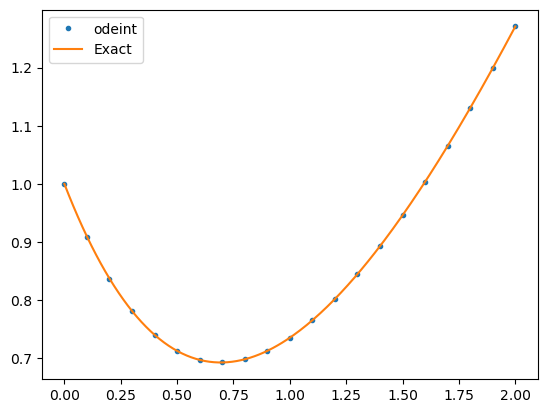

In [53]:
f = lambda y,t: t - y
y0 = 1
t0 = 0; tf = 2; N = 21;
t = np.linspace(t0,tf,N)
y = spi.odeint(f,y0,t)
plt.plot(t,y,'.',label='odeint')
T = np.linspace(t0,tf,200)
Y = 2*np.exp(-T) + T - 1
plt.plot(T,Y,label='Exact')
plt.legend()
plt.show()

### Example: $y' = t - y^2$

Approximate the unique solution of the equation

$$
y' = t - y^2 \ , \ \ y(0) = 2
$$

This is a nonlinear, nonseparable equation therefore we do not have an analytical method to find the exact solution. Use `odeint` to approximate the solution over the interval $[0,10]$.

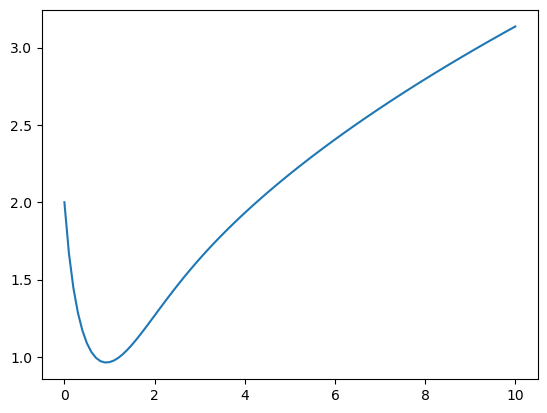

In [57]:
f = lambda y,t: t - y**2
y0 = 2
t0 = 0; tf = 10; N = 101;
t = np.linspace(t0,tf,N)
y = spi.odeint(f,y0,t)
plt.plot(t,y)
plt.show()

### Example: $y' = \cos(t) + \sin(y)$

Approximate solutions of the equation

$$
y' = \cos(t) + \sin(y)
$$
This is a nonlinear, nonseparable equation therefore we do not have an analytical method to find the exact solution. Use `odeint` to approximate the solution over the interval $[0,10]$ for several different initial conditions. 

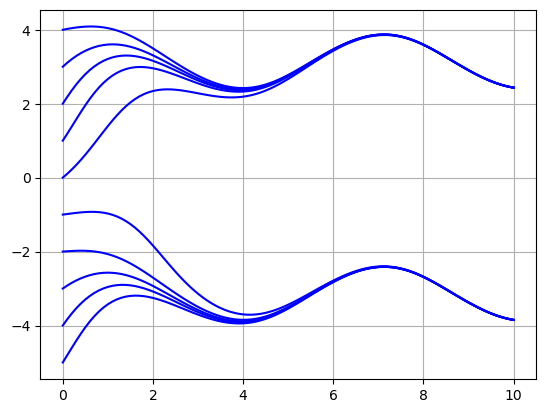

In [61]:
f = lambda y,t: np.cos(t) + np.sin(y)
t0 = 0; tf = 10; N = 101;
t = np.linspace(t0,tf,N)
for y0 in range(-5,5):
    y = spi.odeint(f,y0,t)
    plt.plot(t,y,'b')
plt.grid(True)
plt.show()